In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB

In [2]:
X = np.array([
    [1, 0],  # "good" only -> positive
    [1, 0],
    [1, 1],  # both -> maybe neutral/negative
    [0, 1],  # "bad" only -> negative
    [0, 1],
    [0, 1],
])
y = np.array([1, 1, 0, 0, 0, 0])  # 1 = positive, 0 = negative

In [3]:
model = BernoulliNB()
model.fit(X, y)

BernoulliNB()

In [4]:
mystery1 = np.array([[1, 0]])  # has "good" not "bad"
mystery2 = np.array([[0, 1]])  # has "bad" not "good"

In [5]:
print("P(y | good, no bad):", model.predict_proba(mystery1))
print("P(y | no good, bad):", model.predict_proba(mystery2))

P(y | good, no bad): [[0.16494845 0.83505155]]
P(y | no good, bad): [[0.94674556 0.05325444]]


In [6]:
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 100),
    np.linspace(-0.2, 1.2, 100)
)

In [7]:
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

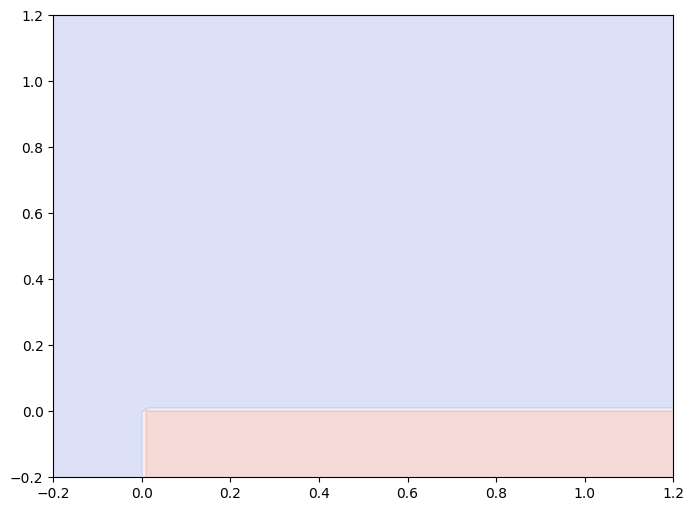

In [9]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

In [10]:
# plot training points
pos = X[y == 1]
neg = X[y == 0]

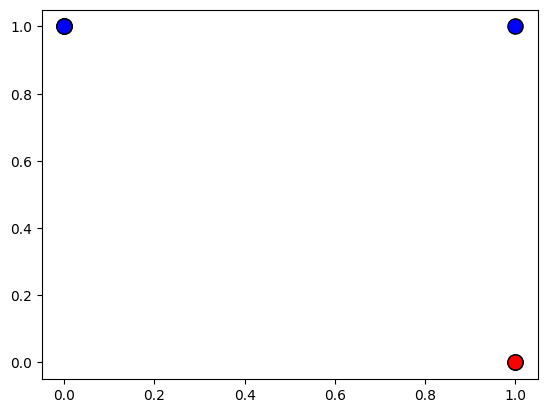

In [15]:
plt.scatter(pos[:, 0], pos[:, 1], color='red', s=120, label='Positive', edgecolors='k')
plt.scatter(neg[:, 0], neg[:, 1], color='blue', s=120, label='Negative', edgecolors='k')

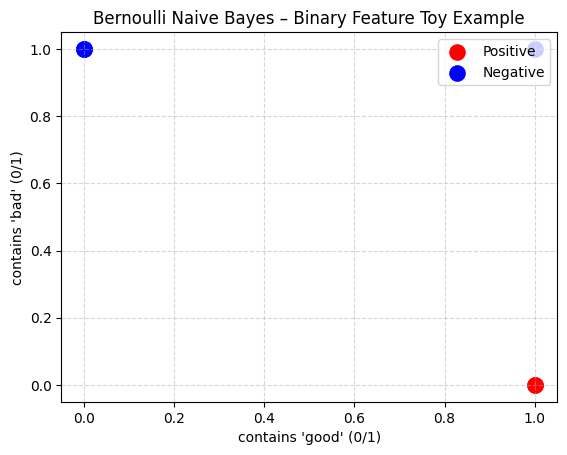

In [24]:
plt.scatter(pos[:, 0], pos[:, 1], color='red', s=120, label='Positive')
plt.scatter(neg[:, 0], neg[:, 1], color='blue', s=120, label='Negative')

plt.title("Bernoulli Naive Bayes – Binary Feature Toy Example")
plt.xlabel("contains 'good' (0/1)")
plt.ylabel("contains 'bad' (0/1)")
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

In [26]:
# Toy "sentiment-like" data
# Feature 0 = count of positive words
# Feature 1 = count of negative words

X_pos = np.array([
    [5, 0],  # many positive, no negative
    [4, 1],
    [6, 0],
    [3, 0],
    [5, 1],
])
y_pos = np.zeros(len(X_pos))   # class 0 = Positive

X_neg = np.array([
    [0, 5],  # many negative, no positive
    [1, 4],
    [0, 6],
    [1, 3],
    [2, 5],
])
y_neg = np.ones(len(X_neg))    # class 1 = Negative

In [27]:
X = np.vstack([X_pos, X_neg])
y = np.hstack([y_pos, y_neg])

In [28]:
model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

In [29]:
print("Class 0 feature means (approx counts):", model.feature_log_prob_[0])
print("Class 1 feature means (approx counts):", model.feature_log_prob_[1])

Class 0 feature means (approx counts): [-0.11778304 -2.19722458]
Class 1 feature means (approx counts): [-1.75785792 -0.189242  ]


In [30]:
# A "mystery sentence":
mystery = np.array([[3, 2]])  # 3 positive-word hits, 2 negative-word hits
probs = model.predict_proba(mystery)
print("Mystery:", mystery[0])
print("P(Positive) =", probs[0][0])
print("P(Negative) =", probs[0][1])

Mystery: [3 2]
P(Positive) = 0.7118240420606492
P(Negative) = 0.28817595793935114


In [31]:
# ---- Visualization (2D grid) ----
x_min, x_max = 0, 7   # counts of positive words
y_min, y_max = 0, 7   # counts of negative words

In [32]:
xx, yy = np.meshgrid(
    np.arange(x_min, x_max + 1, 0.1),
    np.arange(y_min, y_max + 1, 0.1)
)

In [33]:
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

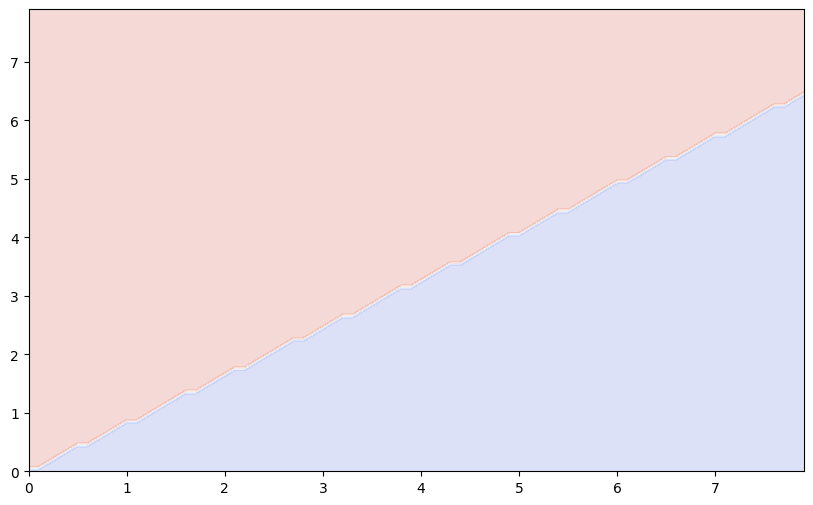

In [34]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

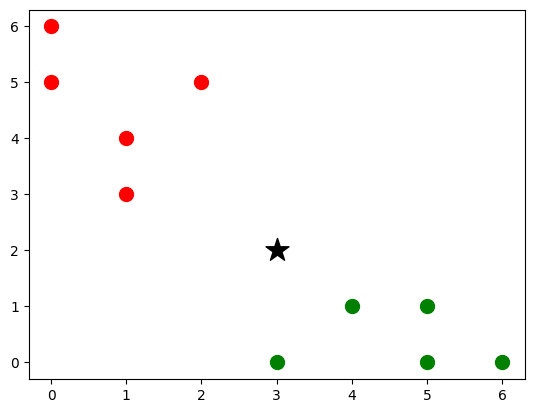

In [37]:
# Plot training data
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='green', s=100, label='Positive (class 0)')
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='red',   s=100, label='Negative (class 1)')

# Plot mystery point
plt.scatter(mystery[0][0], mystery[0][1], color='black', marker='*', s=300, label='Mystery sentence')